In [2]:
# Read the candidate csv file into a dataframe

import pandas as pd

CSV_PATH = "../results/NUMT_candidates.csv"

df = pd.read_csv(CSV_PATH)

In [4]:
# Cluster reads that fall into the same bin

BIN_SIZE = 500

df["bin_start"] = (df["ref_start"] // BIN_SIZE) * BIN_SIZE

grouped = df.groupby(["ref_name", "bin_start", "is_reverse"])

clustered = grouped.agg(
    num_reads=("query_name", "count"),
    avg_ref_start=("ref_start", "mean"),
    avg_mate_start=("mate_start", "mean")
).reset_index()

filtered_clusters = clustered[clustered["num_reads"]  >= 2]

print(f"Clusters before filtering: {len(clustered)}")
print(f"Clusters after filtering: {len(filtered_clusters)}")

Clusters before filtering: 1716
Clusters after filtering: 184


     ref_name  bin_start  is_reverse  num_reads  avg_ref_start  avg_mate_start
1660        9  128995000        True          4    128995402.0     3230.000000
981        20   36175000        True          4     36175464.0    12554.000000
91          1  114737500       False          3    114737983.0     1114.000000
378        12   30733500       False          3     30733718.0    12369.000000
733        18   32210500       False          3     32210595.0     2541.000000
754        18   80136000        True          3     80136386.0    14011.000000
730        18   21623500       False          3     21623527.0    12549.000000
1049       22   39319500        True          3     39319563.0    12462.000000
748        18   65858500       False          3     65858869.0     9242.000000
1135        3  156992500       False          3    156992954.0      300.666667


/tmp/ipykernel_876/3715272716.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')


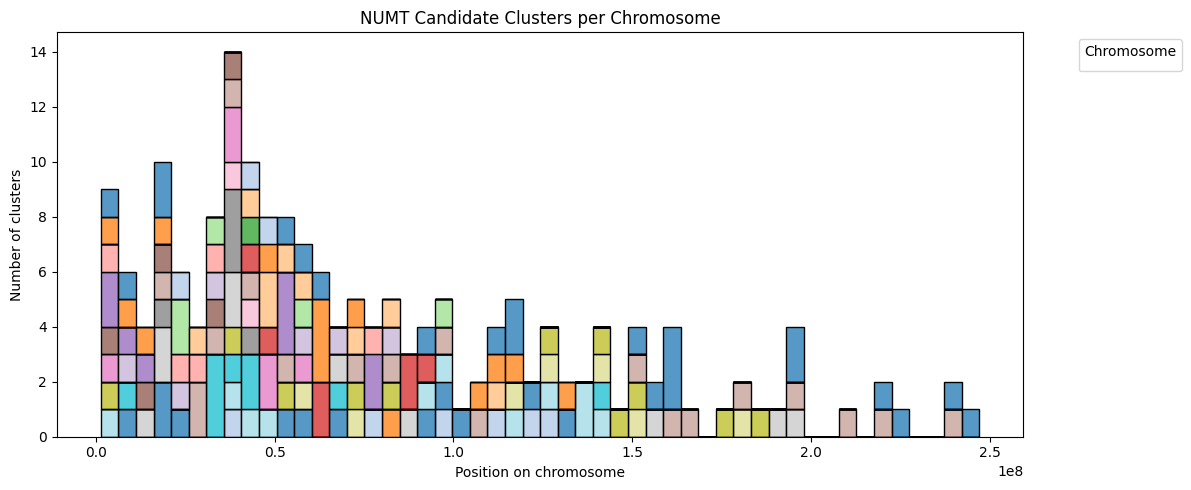

In [ ]:
# View top 10 clusters

top_clusters = filtered_clusters.sort_values("num_reads", ascending=False).head(10)
print(top_clusters)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

sns.histplot(
    data=filtered_clusters,
    x="avg_ref_start",
    hue="ref_name",
    multiple="stack",
    bins=50,
    palette="tab20"     
)

plt.xlabel("Position on chromosome")
plt.ylabel("Number of clusters")
plt.title("NUMT Candidate Clusters per Chromosome")
plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()